## Problem 1

### Soln 1.1

In [1]:
import numpy as np
import mltools as ml

data = np.genfromtxt("data/curve80.txt",delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)

print('Xtr.shape = ' + str(Xtr.shape))
print('Ytr.shape = ' + str(Ytr.shape))
print('Xte.shape = ' + str(Xte.shape))
print('Yte.shape = ' + str(Yte.shape))

Xtr.shape = (60, 1)
Ytr.shape = (60,)
Xte.shape = (20, 1)
Yte.shape = (20,)


### Soln 1.2

In [2]:
lr = ml.linear.linearRegress( Xtr, Ytr )
xs = np.linspace(0,10,200) 
xs = xs[:,np.newaxis]
ys = lr.predict(xs)

### a)

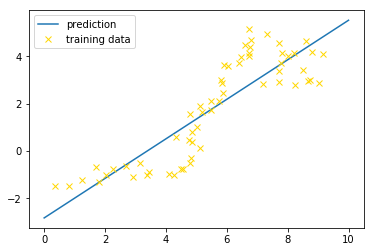

In [3]:
import matplotlib.pyplot as plt
#Ytrhat1 = lr.predict(Xtr)
plt.plot(xs,ys, label = 'prediction')
plt.plot(Xtr,Ytr, 'x',c='gold',label = 'training data')
plt.legend()
plt.show()

### b)

In [4]:
print(lr.theta)


[[-2.82765049  0.83606916]]


The first coefficient is the y-intercept of the line. We can verify that by printing ys[0] as that is the prediction when x = 0.0, so ys[0] is the y-intercept as well.

In [5]:
print(ys[0])

[-2.82765049]


The second coefficient is the slope of the line. We can check that the slope matches our plot by using two points and calculating their slopes(using xs[0],xs[1],ys[0] and ys[1]). and see that it matches the second coefficient

In [6]:
print((ys[1] - ys[0])/(xs[1] - xs[0]))

[0.83606916]


Thus, we have verified that the regression coefficients match our plots.

### c)

### Mean squared error of the predictions of training data

In [7]:
Ytrhat = lr.predict(Xtr)
Ytr2d = np.atleast_2d(Ytr).T
MseTrain = (np.square(Ytr2d - Ytrhat)).mean()
print(MseTrain)

1.127711955609391


### Mean squared error of the predictions of test data

In [8]:
Ytehat = lr.predict(Xte)
Yte2d = np.atleast_2d(Yte).T
MseTest = (np.square(Yte2d - Ytehat)).mean()
print(MseTest)

2.2423492030101246


### Soln 1.3

In [9]:
def MSE(X1,Y1,lr1):
    Y1Phat = lr1.predict(X1)
    MSE = (np.square(Y1Phat - Y1)).mean()
    return MSE

### a)

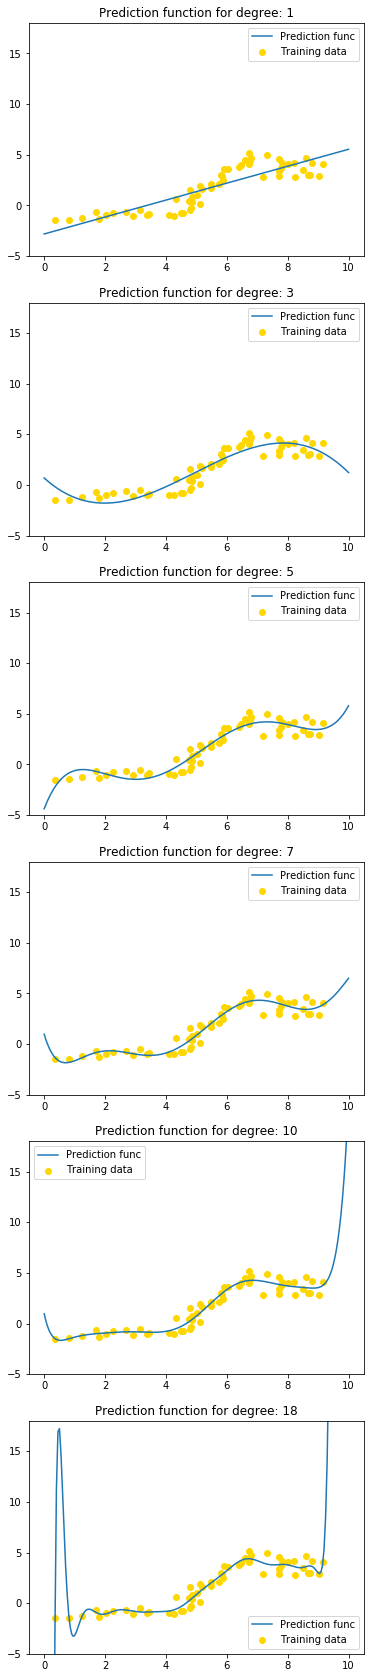

In [10]:
d = [1,3,5,7,10,18]
ErrTrain = [None] * (len(d))
ErrTest = [None] * (len(d))
fig,axes = plt.subplots(len(d),1,figsize = (6,30))
for i,k in enumerate(d):
    XtrP = ml.transforms.fpoly(Xtr,k,bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lrP = ml.linear.linearRegress(XtrP,Ytr)
    
    def Phi(X):
        return ml.transforms.rescale( ml.transforms.fpoly(X,k,False),params)[0]
    
    xsP = Phi(xs)
    yshat = lrP.predict(xsP)
    
    axes[i].plot(xs,yshat,label = 'Prediction func')
    axes[i].scatter(Xtr,Ytr,c='gold',label = 'Training data')
    axes[i].set_title('Prediction function for degree: ' + str(k))
    axes[i].set_ylim(-5,18)
    axes[i].legend(loc = 'best')
    
    ErrTrain[i] = MSE(XtrP,Ytr2d,lrP)
    XteP = Phi(Xte)
    ErrTest[i] = MSE(XteP,Yte2d,lrP)

### b)

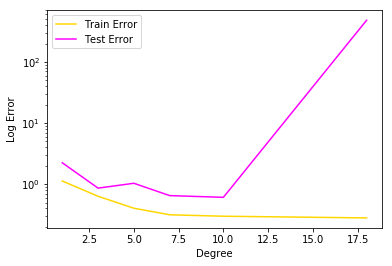

In [11]:
plt.semilogy(d,ErrTrain,c = 'gold',label = 'Train Error')
plt.semilogy(d,ErrTest,c = 'magenta', label = 'Test Error')
plt.xlabel('Degree')
plt.ylabel('Log Error')
plt.legend(loc = 'best')
plt.show()

### c)

The polynomial degree that I would recommend is 10 as at that point the test Error is the minimum and after that it shoots up to a huge value. 

## Problem 2

In [12]:
def CVError(k,nFolds):
    J = [None] * (nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        Yti2d = Yti[:,np.newaxis]
        Yvi2d = Yvi[:,np.newaxis]
        
        XtiP,params1 = ml.transforms.rescale(ml.transforms.fpoly(Xti,k,False))
        learner = ml.linear.linearRegress(XtiP,Yti)
        
        XviP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xvi,k,False),params1)
        J[iFold] = MSE(XviP,Yvi2d,learner)
    return np.mean(J)

### Soln 2.1

[1.2118626629641984, 0.7429005752051661, 0.5910703726406558, 0.7335637831345124, 0.7677056859101964, 231535.66036588722]


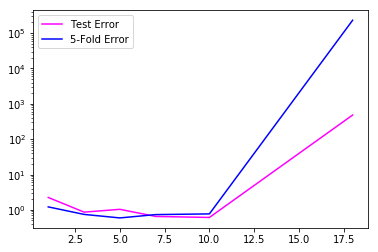

In [13]:
ErrCv5Fold = [None] * (len(d))
for i,k in enumerate(d):
    ErrCv5Fold[i] = CVError(k,5)

plt.semilogy(d,ErrTest,c = 'magenta',label = 'Test Error')
plt.semilogy(d,ErrCv5Fold,c = 'b',label = '5-Fold Error')

plt.legend(loc = 'best')
print(ErrCv5Fold)
plt.show()

### Soln 2.2

For degrees upto 10, the five-fold cross validation MSE estimates are quite similar to the actual test data MSE estimates. However, for degree = 18, the MSE(five-fold cross validation) is almosal equal to the square of the MSE(actual test data). This can be because even if one of the splits in 5-fold cross validation splits the training data so that the MSE is extremely high, then its average is also likely to be very high.

### Soln 2.3

Let us print the 5-fold cross validation errors calculated above:

In [14]:
print(ErrCv5Fold)

[1.2118626629641984, 0.7429005752051661, 0.5910703726406558, 0.7335637831345124, 0.7677056859101964, 231535.66036588722]


As we can see, the value of MSE for 5-fold cross validation is the least when the degree = 5(MSE being = 0.59107....).
So, the degree value for the least MSE for the 5-fold cross validation is 5.

### Soln 2.4

[1.1795458641313101, 0.5984555010978514, 2.219526156064185, 0.5910703726406558, 0.596338005001163, 0.6058256908836257, 0.6448758386950665, 0.6905669661744517]


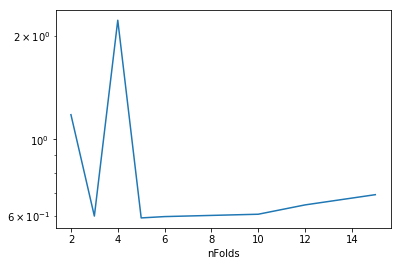

In [15]:
nFoldsArr = [2,3,4,5,6,10,12,15]
degree = 5

ErrCvDeg5 = [None] * (len(nFoldsArr))
for i,iFold2 in enumerate(nFoldsArr):
    ErrCvDeg5[i] = CVError(degree,iFold2)
print(ErrCvDeg5)

plt.semilogy(nFoldsArr,ErrCvDeg5,label = 'CV Error with degree 5')
plt.xlabel('nFolds')

plt.show()

## Statement of Collaboration

Before starting to work on this HW, I discussed with Shih-Min Chen why the T part is required while converting a 1d to 2d matrix using np.atleast_2d() function. I used stackoverflow to understand how to calculate mean square error between two numpy arrays. 